# Hough Transform

霍夫變換  
用於影像的特徵檢測，如檢測直線、圓形  
是將空間中的X,Y座標轉換到 rho, theta的極座標上
利用極座標上的交點來取出圖形上的線段

圖片取自維基百科

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Hough_transform_diagram.svg/800px-Hough_transform_diagram.svg.png)

藍色的線上現在有三個點，對於每一個點來說，有無限條的線可以通過  
對於每一條通過的線，利用及座標來表示的話，可以投射到一個極座標空間的座標軸  
而每一個點所能構成的線，在極座標上，會形成一條曲線  
而這些曲線的焦點，就能代表出一條線  
以上圖來看，藍線這條線，他能夠通過XY座標的三個點  
在極座標上，他們的rho跟theta都是相等的  

![](http://monkeycoding.com/wp-content/uploads/2015/12/hough_2.jpg)
  
這個演算法  
需要定義角度跟距離的解析度  
解析度太高會太耗時間，太低可能會有漏偵測的狀況
另外可以利用一個閥值來判斷  
當交點的重複出現大於一個值以後  
才會把這個值回傳

In [1]:
import os 
import cv2 as cv
import matplotlib.pyplot as plt

root = os.getcwd()
img_path = os.path.join(root,'Image/findLine.jpg')

img = cv.imread(img_path,0)

plt.figure(figsize=(9,9))
plt.imshow(img,'gray')

首先需要取得圖片的邊緣資訊  
利用Canny的算法取得  

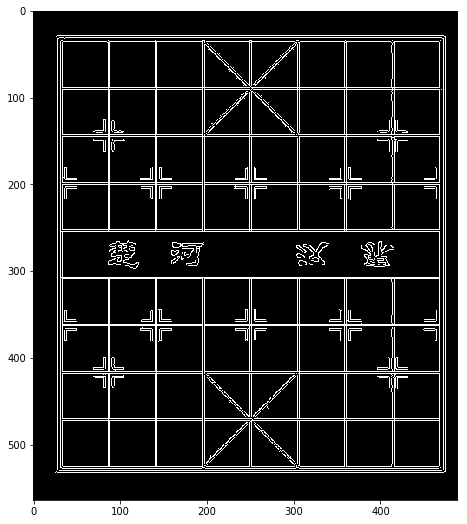

In [2]:
res = cv.Canny(img, 50, 200, 3)

plt.figure(figsize=(9,9))
plt.imshow(res,'gray')

## HoughLines

利用此張圖丟入HoughLines中  
HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]]) 
需要參數為:  
* rho : 長度解析度
* theta : 角度解析度
* threshold: 閥值

回傳的會是rho與theta的值 

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

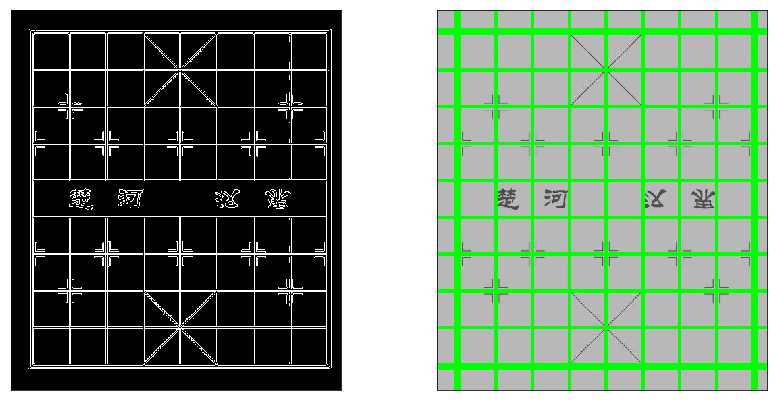

In [3]:
import numpy as np
lines = cv.HoughLines(res,1,np.pi/180,300)
line = lines[:,0,:]

plt.figure(figsize=(14,7))
plt.subplot(1,2,1),plt.imshow(res,'gray')
plt.xticks([]),plt.yticks([])
img2 = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

for rho, theta in line:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a)) 
    cv.line(img2,(x1,y1),(x2,y2),(0,255,0),2)

plt.subplot(1,2,2),plt.imshow(img2)
plt.xticks([]),plt.yticks([])
    

## HoughLinesP

因為HoughLines為大量運算  
opencv另外有一HoughLinesP做為採樣運算  
由於是採樣的關係，閥值需要設定低一些  
傳入的值稍有不同，需要增加:
* minLineLength : 最短線段長，短於這個的不採樣
* maxLineGap : 線段間最短距離，兩條線少於這距離，視為一條線

回傳的也不再是rho與theta而是座標  
可以省去功夫轉換成座標軸而直接畫線

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

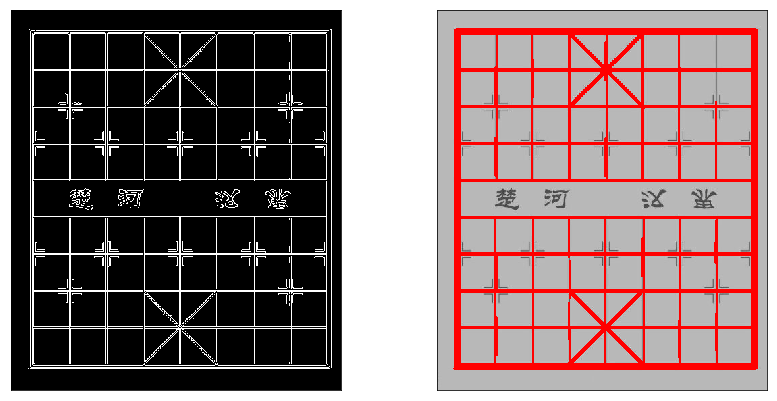

In [4]:
import numpy as np
lines = cv.HoughLinesP(res,1,np.pi/180,50,minLineLength=50,maxLineGap=10)
line = lines[:,0,:]

plt.figure(figsize=(14,7))
plt.subplot(1,2,1),plt.imshow(res,'gray')
plt.xticks([]),plt.yticks([])
img2 = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

for x1,y1,x2,y2 in line:
    cv.line(img2,(x1,y1),(x2,y2),(255,0,0),2)

plt.subplot(1,2,2),plt.imshow(img2)
plt.xticks([]),plt.yticks([])

## HoughCircles


$$ (x−x_{center})^2+(y−y_{center})^2=r_2 $$
圓的公式相較於直線多了一組參數  
而投射到的極座標空間就是三圍的空間  
相較於二維更耗時，opencv內以一種優化的梯度法來求取值  
cv.HoughCircles(image, method, dp, minDist, circles, param1, param2, minRadius, maxRadius) 

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

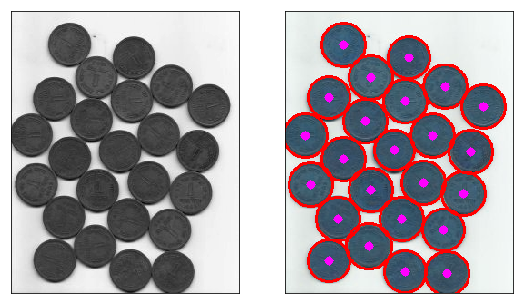

In [5]:
img_path = os.path.join(root,'Image/coins.jpg')
img = cv.imread(img_path,1)
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

plt.figure(figsize=(9,9))
plt.subplot(121),plt.imshow(gray,'gray')
plt.xticks([]),plt.yticks([])


circles1 = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,4,param1=100,param2=42,minRadius=10,maxRadius=40)
circles = circles1[0,:,:]
circles = np.uint16(np.around(circles))
for i in circles[:]: 
    cv.circle(img,(i[0],i[1]),i[2],(255,0,0),2)
    cv.circle(img,(i[0],i[1]),2,(255,0,255),5)

plt.subplot(122),plt.imshow(img)
plt.xticks([]),plt.yticks([])